# Visualization

In this notebook example, we'll take a look at Datumaro visualization Python API. Specifically, we are going to provide the example codes for instance segmentation and captioning tasks with MS-COCO 2017 dataset.

## Prerequisite
### Download COCO 2017 validation dataset

In [2]:
!mkdir coco_dataset
!curl http://images.cocodataset.org/zips/val2017.zip --output coco_dataset/val2017.zip --silent
!curl http://images.cocodataset.org/annotations/annotations_trainval2017.zip --output coco_dataset/annotations_trainval2017.zip --silent
!curl http://images.cocodataset.org/annotations/panoptic_annotations_trainval2017.zip --output coco_dataset/panoptic_annotations_trainval2017.zip --silent

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  777M  100  777M    0     0  2997k      0  0:04:25  0:04:25 --:--:-- 7251k0:31  0:00:10  0:20:21  913k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  241M  100  241M    0     0  3601k      0  0:01:08  0:01:08 --:--:-- 4707k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  820M  100  820M    0     0  3661k      0  0:03:49  0:03:49 --:--:-- 4215k


### Extract the downloaded dataset

We extract all the downloaded files and only remain `val2017` subset by removing `train2017` annotation files. After running this cell, you will get the following directory structure.
```
coco_dataset
├── annotations
│   ├── captions_val2017.json
│   ├── instances_val2017.json
│   ├── panoptic_val2017
│   ├── panoptic_val2017.json
│   └── person_keypoints_val2017.json
├── images
│   └── val2017
```

In [1]:
!unzip -q coco_dataset/val2017.zip -d coco_dataset/images
!unzip -q coco_dataset/annotations_trainval2017.zip -d coco_dataset
!unzip -q coco_dataset/panoptic_annotations_trainval2017.zip -d coco_dataset
!unzip -q coco_dataset/annotations/panoptic_val2017.zip -d coco_dataset/annotations
!find coco_dataset -name "*_train2017.json" | xargs rm

## Visualize dataset
### Visualize COCO instance segmentation dataset

In [1]:
# Copyright (C) 2021 Intel Corporation
#
# SPDX-License-Identifier: MIT

import datumaro as dm
from datumaro.components.visualizer import Visualizer

dataset = dm.Dataset.import_from("coco_dataset", format='coco_instances')
print("Subset candidates:", dataset.subsets().keys())
subset = list(dataset.subsets().keys())[0] # val2017
print("Subset:", subset)

Subset candidates: dict_keys(['val2017'])
Subset: val2017


In [2]:
def get_ids(dataset: dm.Dataset, subset: str):
    ids = []
    for item in dataset:
        if item.subset == subset:
            ids += [item.id]
    
    return ids

ids = get_ids(dataset, subset)
print("DatasetItem ids:", ids[:4])

DatasetItem ids: ['000000397133', '000000037777', '000000252219', '000000087038', '000000174482']


In this cell, we only draw 4 images (`ids[:4]`) without any annotations (setting `draw_only_image=True`).

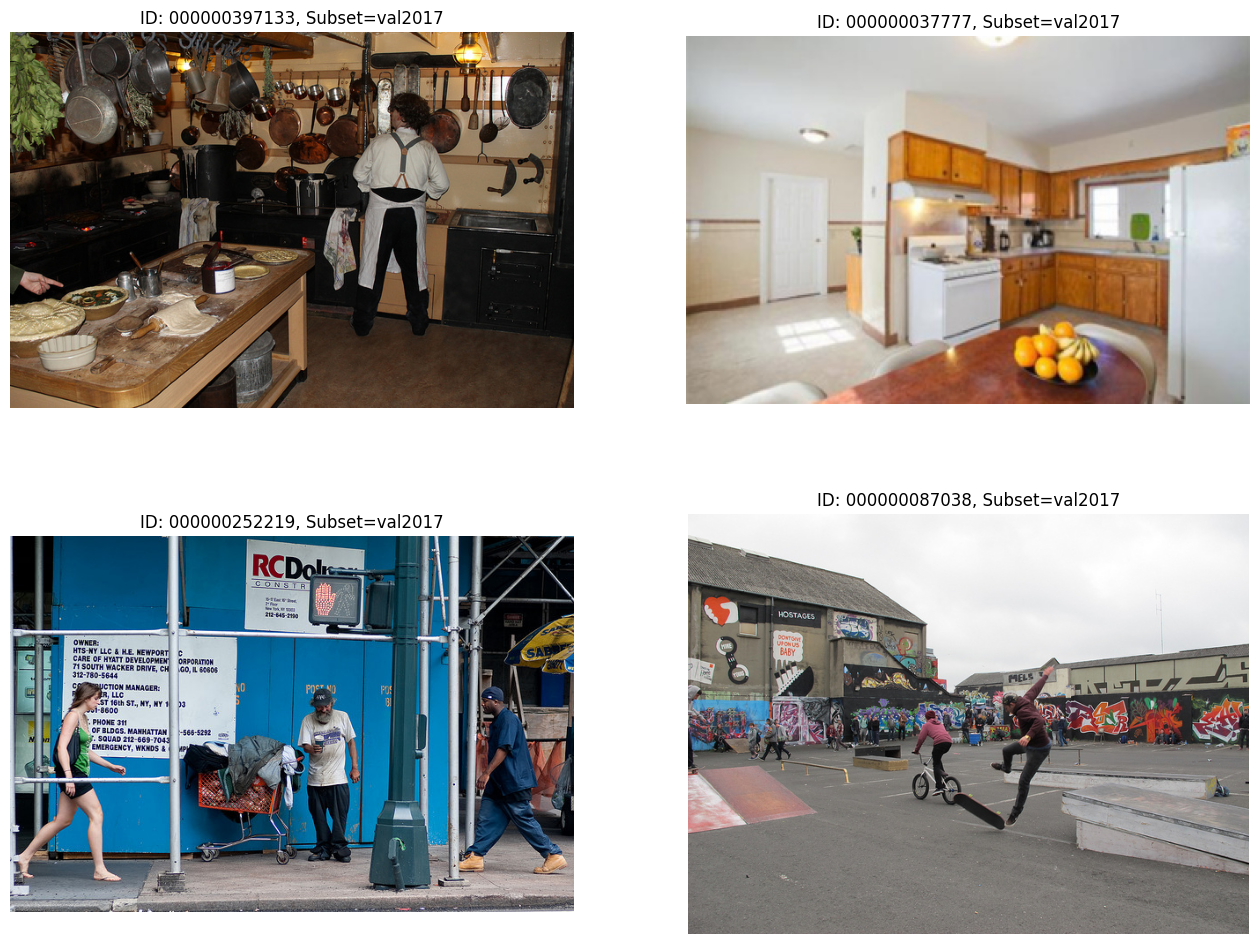

In [3]:
visualizer = Visualizer(dataset, draw_only_image=True, figsize=(16, 12))
fig = visualizer.vis_gallery(ids[:4], subset, (None, None))
fig.show()

In this time, we'll draw polygon annotations (instance segmentation task) by `draw_only_image=False` with `alpha=0.7`. It will automatically infer the grid size of gallery as (2, 2) from the number of input samples.

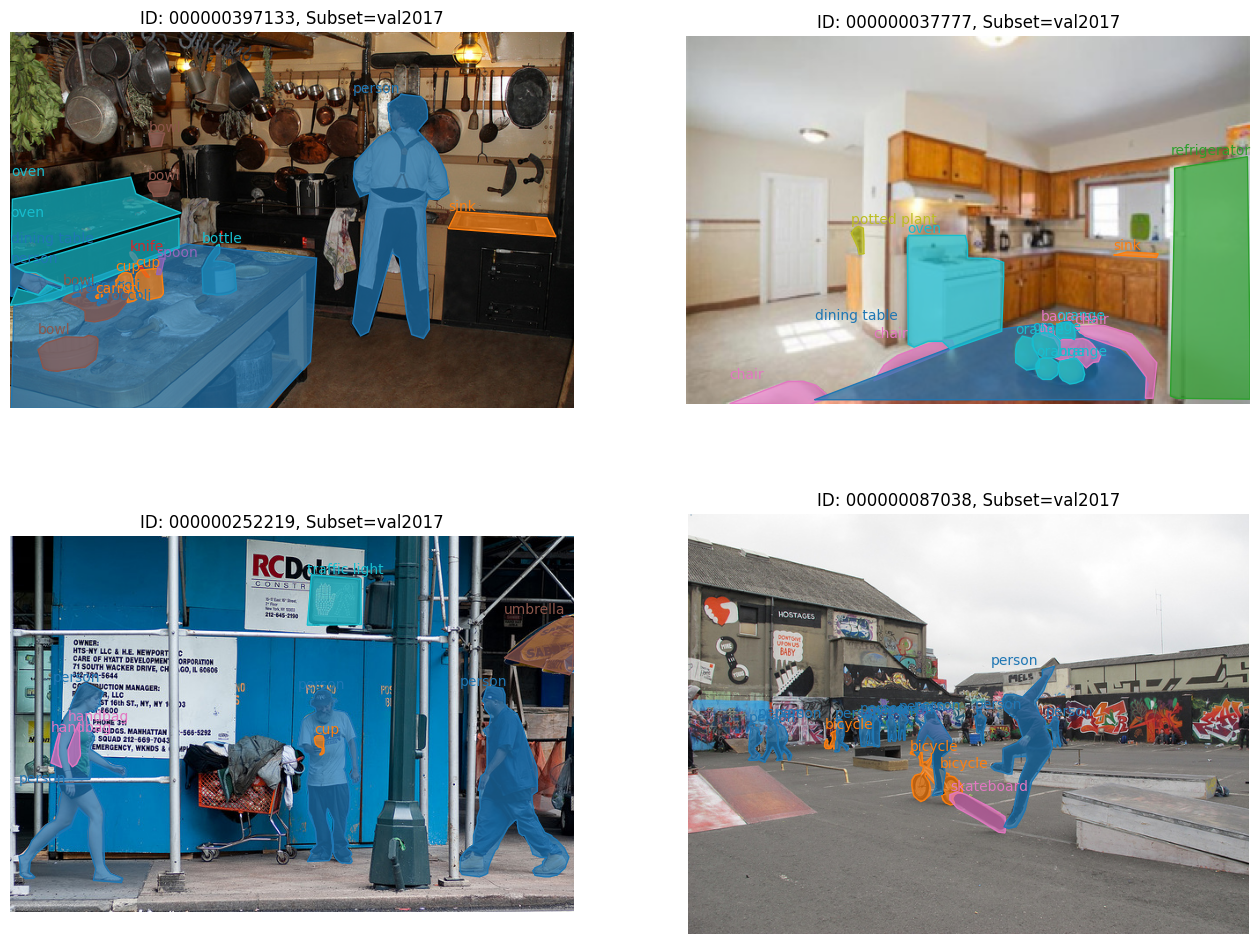

In [4]:
visualizer = Visualizer(dataset, draw_only_image=False, figsize=(16, 12), alpha=0.7)
fig = visualizer.vis_gallery(ids[:4], subset, grid_size=(None, None))
fig.show()

In this example, we draw 4 samples in a row. Thus, the gallery has a (1, 4) grid by giving `grid_size=(1, 4)`.

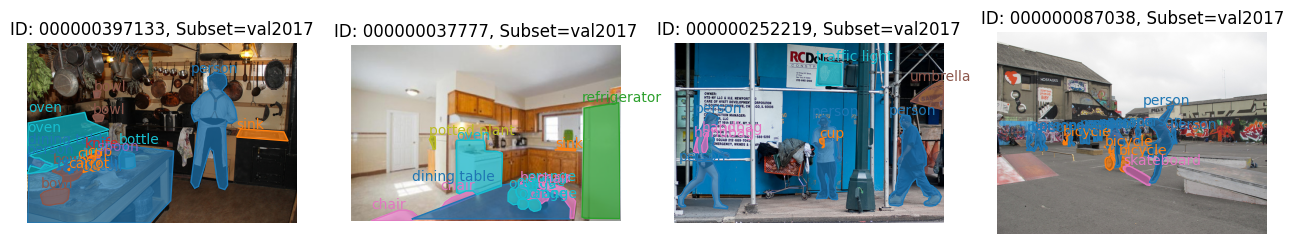

In [10]:
visualizer = Visualizer(dataset, draw_only_image=False, figsize=(16, 8), alpha=0.7)
fig = visualizer.vis_gallery(ids[:4], subset, grid_size=(1, 4))
fig.show()

It is also possible to visualize a sample one by one.

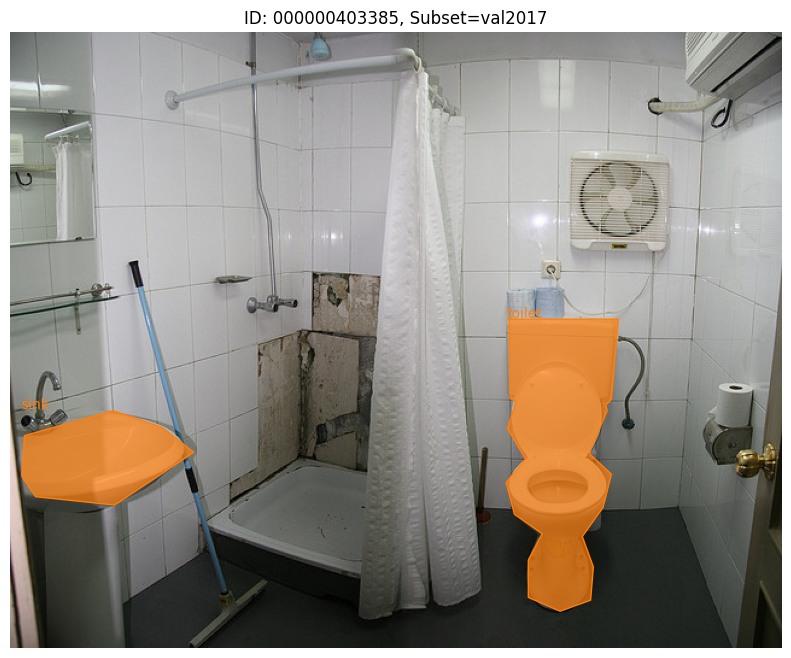

In [12]:
fig = visualizer.vis_one_sample(ids[5], subset)
fig.show()

### Visualize COCO panoptic segmentation dataset

DatasetItem ids: ['000000403385', '000000006818', '000000480985', '000000458054']


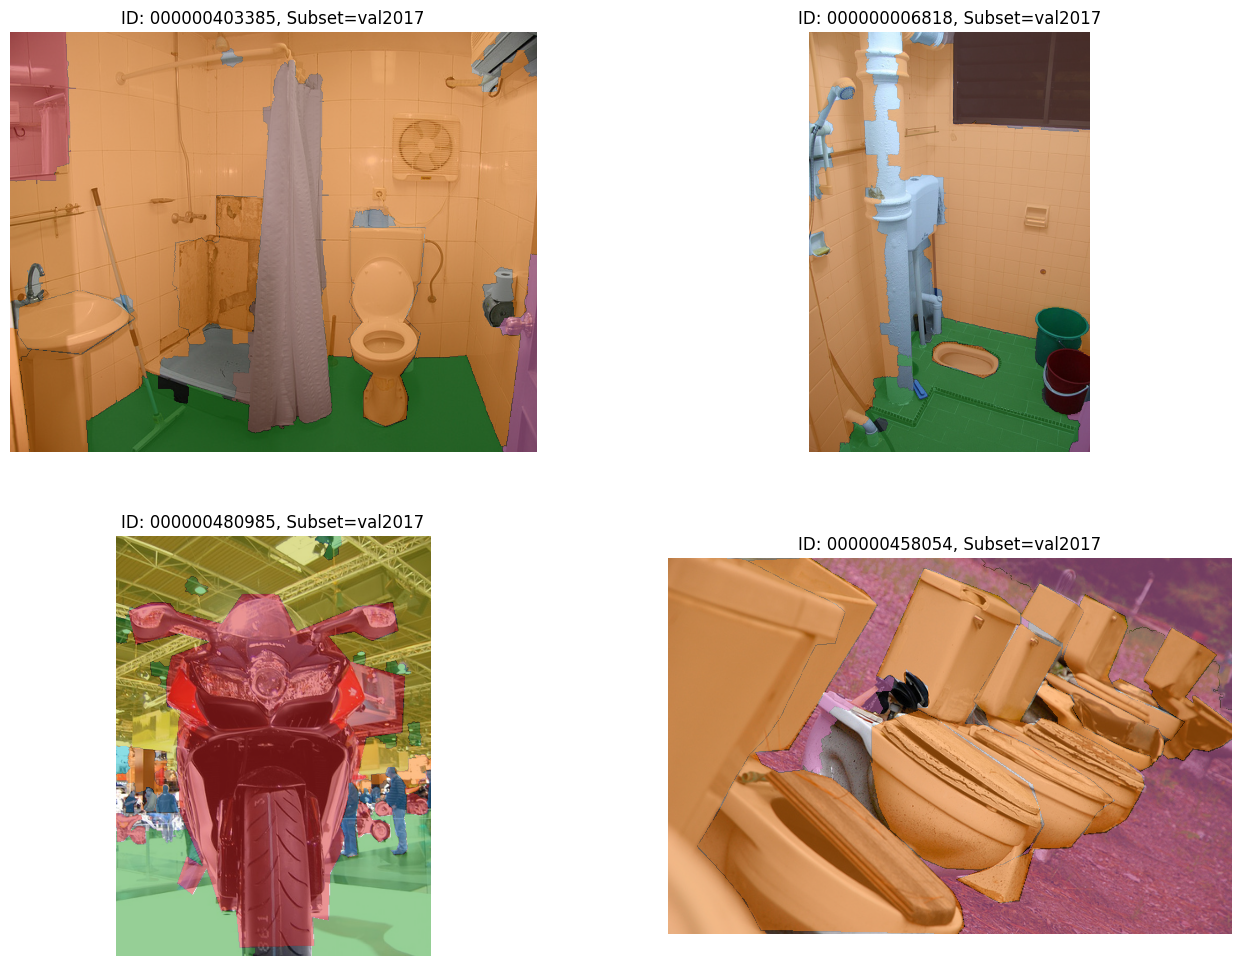

In [16]:
dataset = dm.Dataset.import_from("coco_dataset", format='coco_panoptic')
ids = get_ids(dataset, subset)
print("DatasetItem ids:", ids[5:9])

visualizer = Visualizer(dataset, draw_only_image=False, figsize=(16, 12), alpha=0.5)
fig = visualizer.vis_gallery(ids[5:9], subset, grid_size=(None, None))
fig.show()

### Visualize COCO captions dataset

DatasetItem ids: ['000000143931', '000000303818', '000000463730', '000000460347']


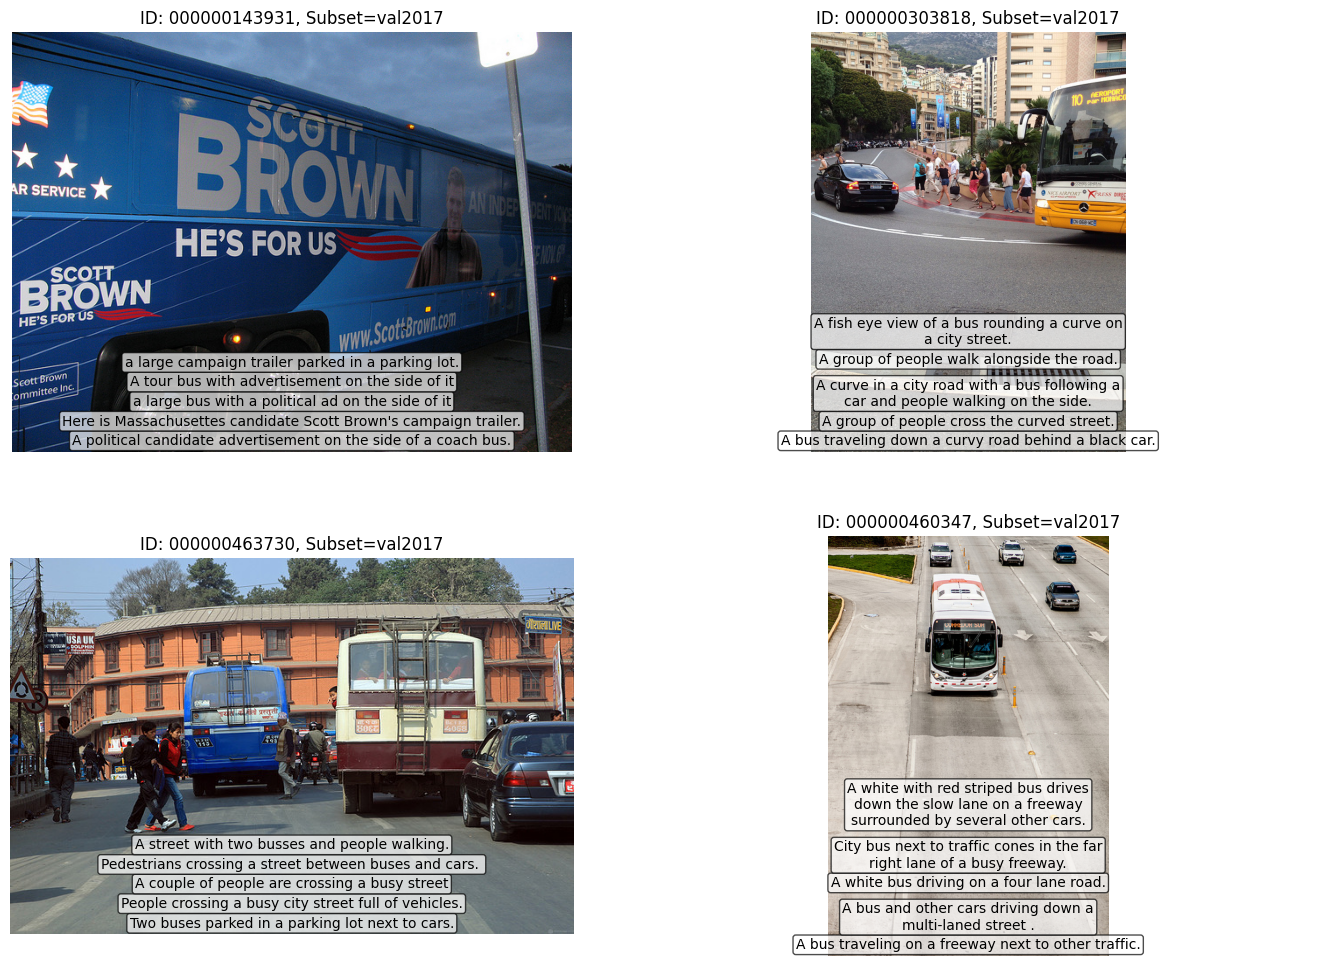

In [21]:
dataset = dm.Dataset.import_from("coco_dataset", format='coco_captions')
ids = get_ids(dataset, subset)
print("DatasetItem ids:", ids[20:24])

visualizer = Visualizer(dataset, draw_only_image=False, figsize=(16, 12), alpha=0.7)
fig = visualizer.vis_gallery(ids[20:24], subset, grid_size=(None, None))
fig.show()